# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Sam Halvorson"
__contact__   = "samuel.t.halvorson@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [1]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [2]:
dataPD = pd.read_csv("KBIS_sounding.csv", delimiter=",", skiprows=1)

print(dataPD)

    pressure[mb]  height[m]  temperature[degC]  dewpoint[degC]  u-wind[m/s]  \
0         1000.0      355.0                NaN             NaN          NaN   
1          959.0      649.0              -25.3           -28.8          NaN   
2          949.0      726.0              -24.1           -27.6          NaN   
3          936.0      826.0              -22.7           -28.7          NaN   
4          925.0      915.0              -22.9           -28.9         2.98   
5          898.0     1131.0              -22.9           -28.9          NaN   
6          851.0     1526.0              -21.3           -35.3          NaN   
7          850.0     1536.0              -21.3           -35.3         2.57   
8          763.0     2328.0              -22.5           -40.5          NaN   
9          730.0     2651.0              -24.1           -41.1          NaN   
10         721.0     2741.0              -23.1           -41.1          NaN   
11         707.0     2884.0              -22.9      

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [3]:
#grabs the first line which is the title of the data
titles = open("KBIS_sounding.csv", "r").readlines()[1]
#print(titles)

#grab each variable and add units pressure[mb],height[m],temperature[degC],dewpoint[degC],u-wind[m/s],v-wind[m/s]
pressure = dataPD["pressure[mb]"].values
pressure = pressure * units("millibars")

height = dataPD["height[m]"].values
height = height * units("meters")

temperature = dataPD["temperature[degC]"].values
temperature = temperature * units("degC")

dewpoint = dataPD["dewpoint[degC]"].values
dewpoint = dewpoint * units("degC")

uWind = dataPD["u-wind[m/s]"].values
uWind = uWind * units("m/s")
uWind.ito("knots")

vWind = dataPD["v-wind[m/s]"].values
vWind = vWind * units("m/s")
vWind.ito("knots")

#print(pressure)
#print(height)
#print(temperature)
#print(dewpoint)
#print(uWind)
#print(vWind)


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

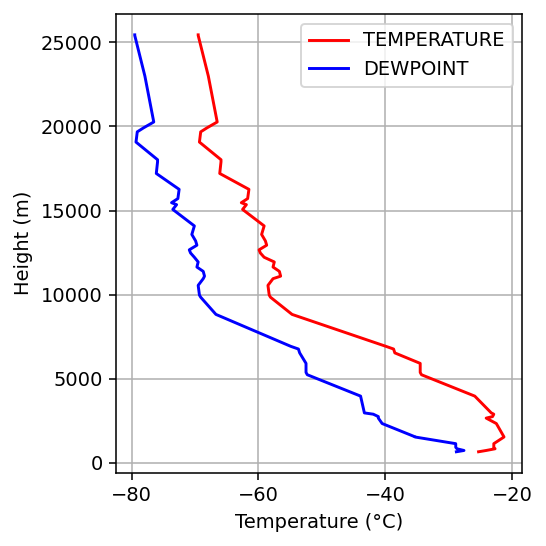

In [4]:
#create a figure
fig = plt.figure(figsize=[4, 4], dpi=140)

#create subplot
plot1 = plt.subplot(1,1,1)

#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
plot1.plot(temperature, height, color="red", label="TEMPERATURE")


#plot dewpoint in blue
#give it the label of DEWPOINT
plot1.plot(dewpoint, height, color="blue", label="DEWPOINT")

#add a background grid
plt.grid()

#add a x label with units (including the degree symbol) - google it and figure it out :)
plt.xlabel("Temperature (°C)")

#add a y label with units
plt.ylabel("Height (m)")

#add a legend
plot1.legend()

#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png')

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

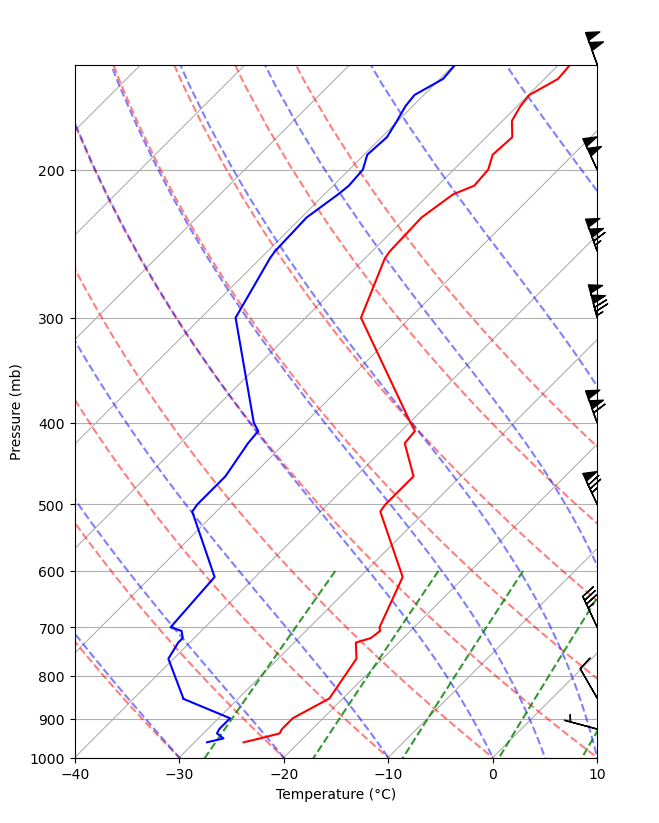

In [5]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig2 = plt.figure(figsize=[9, 9], dpi=100)

#create Skew-T
skew = SkewT(fig2,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel("Temperature (°C)")

#add a y label with units 
plt.ylabel("Pressure (mb)")

#add temperature in red
skew.plot(pressure, temperature, "r")

#add dewpoint in blue
skew.plot(pressure, dewpoint, "b")

#plot wind barbs
skew.plot_barbs(pressure, uWind, vWind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40, 10)

#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 150)

#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png')

### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

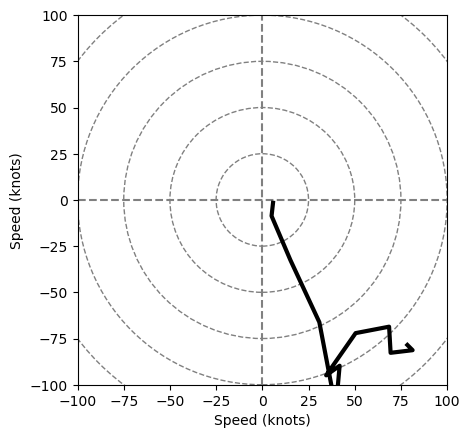

In [6]:
#remove nans from u and v

'''the dropna method only works with a pandas dataframe, so I decided to read in the data again'''

u_hodo = dataPD["u-wind[m/s]"].dropna().values * units("m / s")
v_hodo = dataPD["v-wind[m/s]"].dropna().values * units("m / s")
u_hodo.ito("knots") #make sure the units are right
v_hodo.ito("knots")

#create the hodograph (have the range from 0-100kts with 25kt increment)
hod = plt.subplot()
h = Hodograph(hod, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo, color="black")

#make the wind curve black


#add x and y labels
plt.ylabel("Speed (knots)")
plt.xlabel("Speed (knots)")

#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png
plt.savefig('hodo.png')

### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

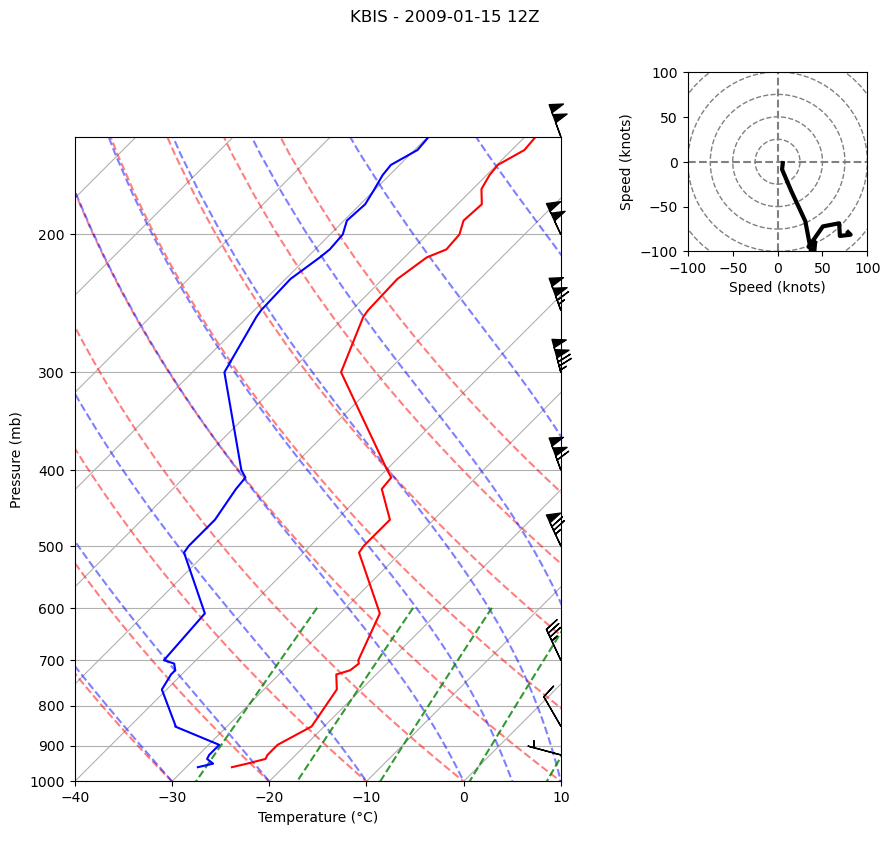

In [7]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel("Temperature (°C)")
#add a y label with units 
plt.ylabel("Pressure (mb)")

#add temperature in red
skew.plot(pressure, temperature, "r")
#add dewpoint in blue
skew.plot(pressure, dewpoint, "b")

#plot wind barbs
skew.plot_barbs(pressure, uWind, vWind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40, 10)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 150)
#add a hodograph
ax = fig.add_subplot(gs[0,-1])
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo, color="black")


#add x and y labels
plt.ylabel("Speed (knots)")
plt.xlabel("Speed (knots)")


#add a title with the date and launch location:
title = "KBIS - 2009-01-15 12Z"
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
plt.savefig('skew_hodo.png')

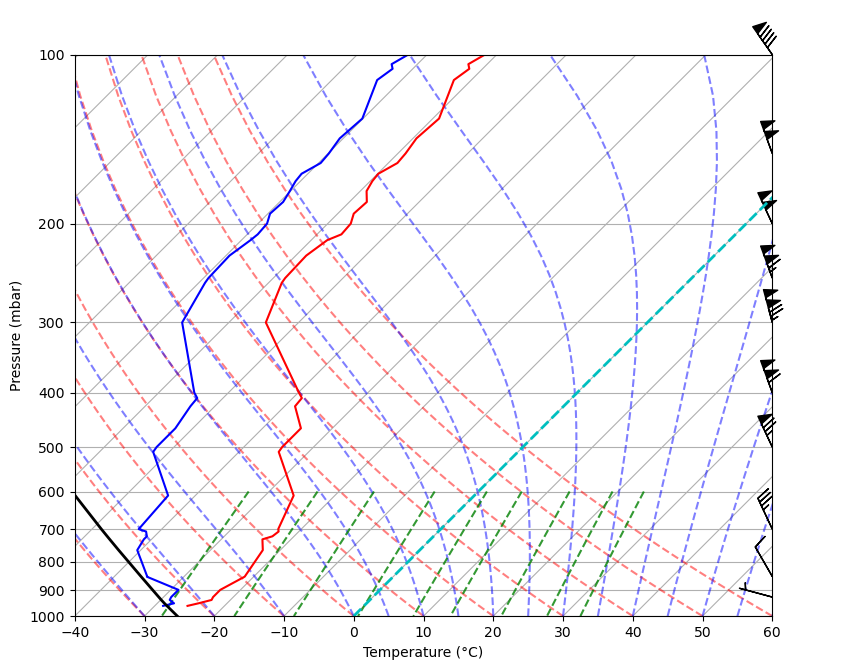

In [8]:
dataPD = pd.read_csv("KBIS_sounding.csv", delimiter=",", skiprows=1)


p = dataPD["pressure[mb]"].values
p = p * units("millibars")

T = dataPD["temperature[degC]"].values
T = T * units("degC")

Td = dataPD["dewpoint[degC]"].values
Td = Td * units("degC")

u = dataPD["u-wind[m/s]"].values
u = u * units("m/s")
u.ito("knots")

v = dataPD["v-wind[m/s]"].values
v = v * units("m/s")
v.ito("knots")


fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(p, T, 'r')
skew.plot(p, Td, 'b')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Set some better labels than the default
skew.ax.set_xlabel(f'Temperature ({T.units:~P})')
skew.ax.set_ylabel(f'Pressure ({p.units:~P})')

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[1], Td[1]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof, Td)
skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()